In [5]:
from demo_model import SGG_Model
import cv2
import os

import matplotlib.pyplot as plt

config_path = "../checkpoints/react_PSG/config.yml"
weights_path = "../checkpoints/react_PSG/best_model_epoch_11.pth"

source = "./example.jpg"
model = SGG_Model(config_path, weights_path, rel_conf=0.1, box_conf=0.01, show_fps=False)

2024-12-10 19:47:10.837 | INFO     | sgg_benchmark.utils.logger:setup_logger:31 - Using loguru logger with level: INFO
Overriding model.yaml nc=80 with nc=133
loading word vectors from /home/maelic/glove/glove.6B.200d.pt
loading word vectors from /home/maelic/glove/glove.6B.200d.pt


In [6]:
if '.jpg' in source:
    example_img = source

    img = cv2.imread(example_img)

    clean_img, graph = model.predict(img, visu_type='image')

elif os.path.isdir(source):
    os.makedirs(source + '/results', exist_ok=True)

    for file in os.listdir(source):
        example_img = source + '/' + file

        if '.jpg' not in example_img:
            continue

        img = cv2.imread(example_img)

        clean_img, graph = model.predict(img, visu_type='image')

        # to rgb
        clean_img = cv2.cvtColor(clean_img, cv2.COLOR_BGR2RGB)
        # save to dir
        cv2.imwrite(source + '/results/res_' + file, clean_img)

Objects detected:  29
Relationships detected:  70


/home/maelic/miniconda3/envs/sgg/lib/python3.10/site-packages/pygraphviz/agraph.py:1403: RuntimeWarning: Warning: (533, 800) is not a known color.

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


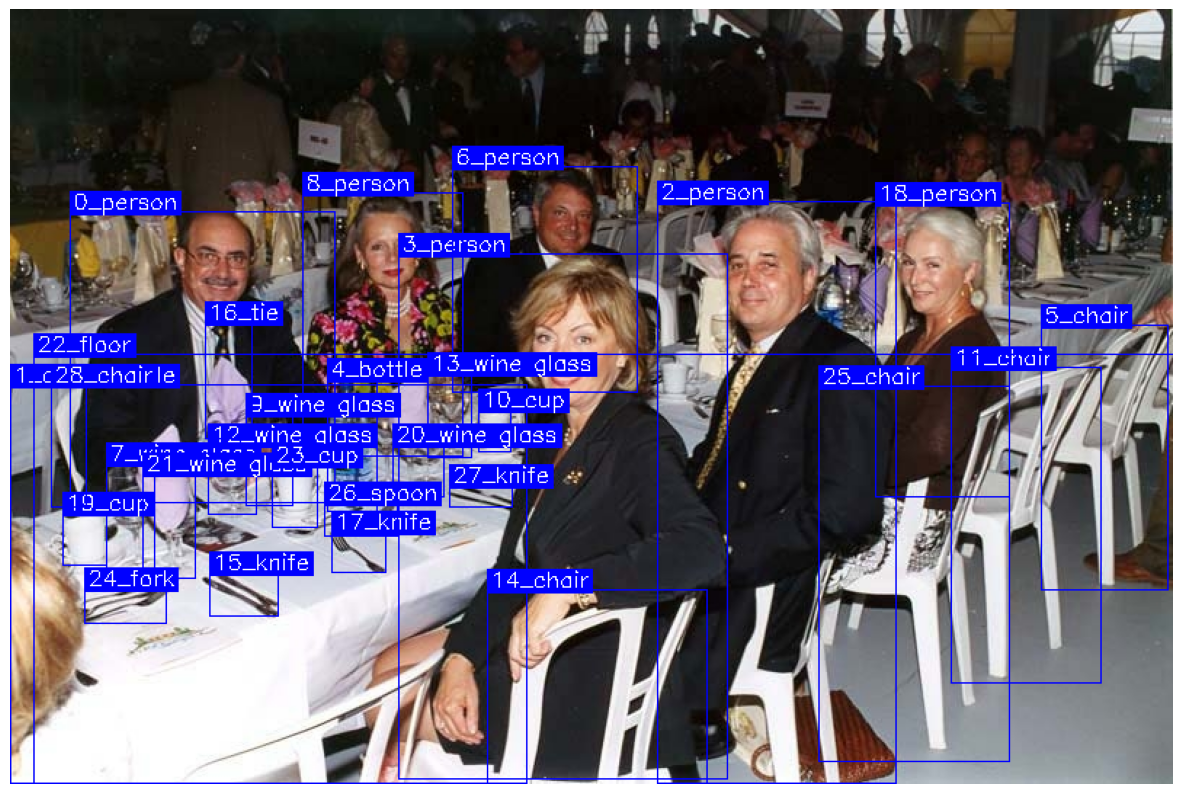

In [7]:
plt.figure(figsize=(15, 15))  # You can adjust the size as needed
plt.imshow(clean_img)
plt.axis('off')
plt.show()

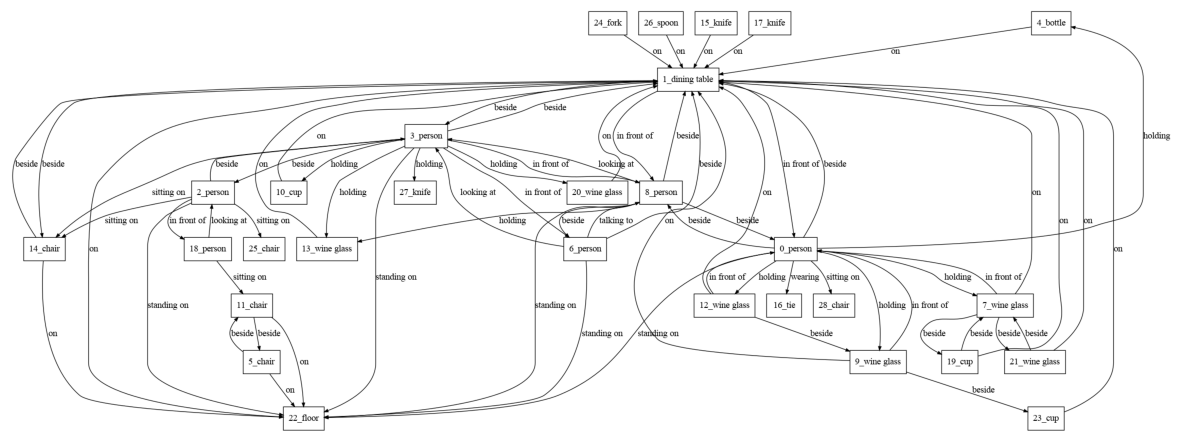

In [10]:
plt.figure(figsize=(15, 8))  # You can adjust the size as needed
plt.imshow(graph)
plt.axis('off')
plt.show()